# What is Scikit-Learn?


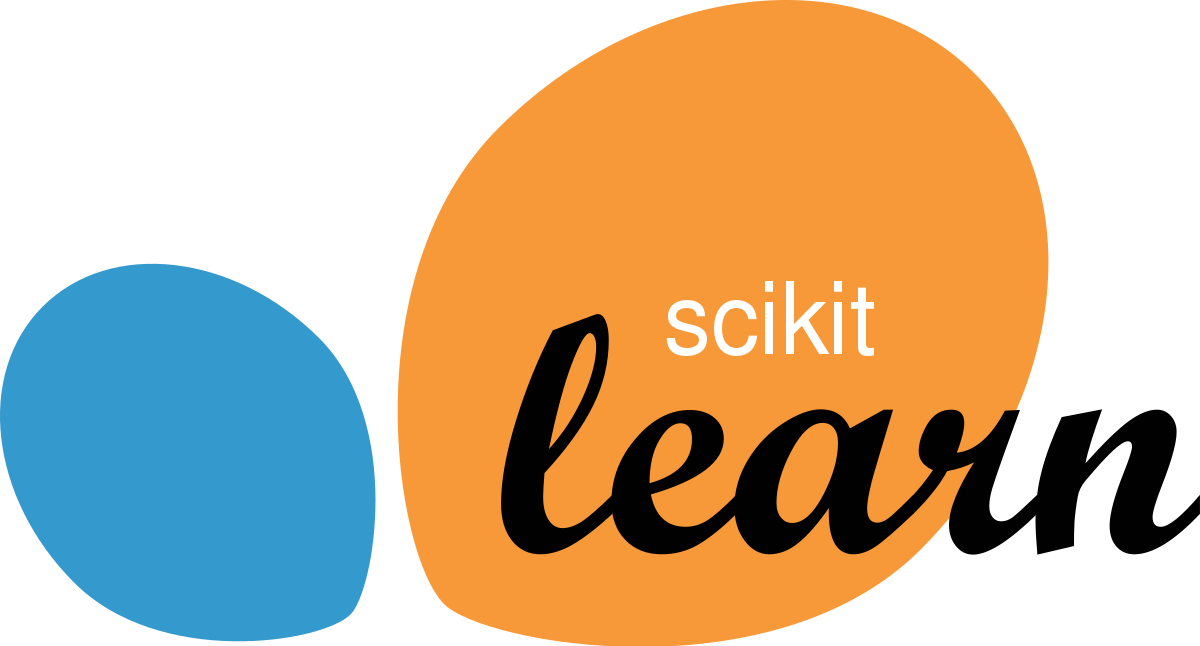


Scikit-learn is one of the most commonly used packages in Machine Learning and Python. It provides a selection of efficient tools for machine learning and statistical modeling including ***classification***, ***regression***, ***clustering***. Simple and efficient tool for data mining and data analysis. Open source, commercially useable on [**BSD**](https://en.wikipedia.org/wiki/BSD_licenses) license.
The really incredible part about scikit-learn is the vast collection of machine learning algorithms that are all included and we can just try them out with minimal code adjustments.


It's built on:
- NumPy
- SciPy
- matplotlib




## Origin

Originally called scikits.learn and was initially developed by **David Cournapeau** as a Google summer of code project in 2007. Later, in 2010, **Fabian Pedregosa**, **Gael Varoquaux**, **Alexandre Gramfort**, and **Vincent Michel**, from [FIRCA](https://en.wikipedia.org/wiki/French_Institute_for_Research_in_Computer_Science_and_Automation), took this project at another level and made the first public release (v0.1 beta) on 1st Feb. 2010. [[9](#section10)]

## Who is using scikit-learn?

*Few examples of companies who use scikit-learn*: [[10](#section11)]
- **BNP Paribas Cardiff**
<div>
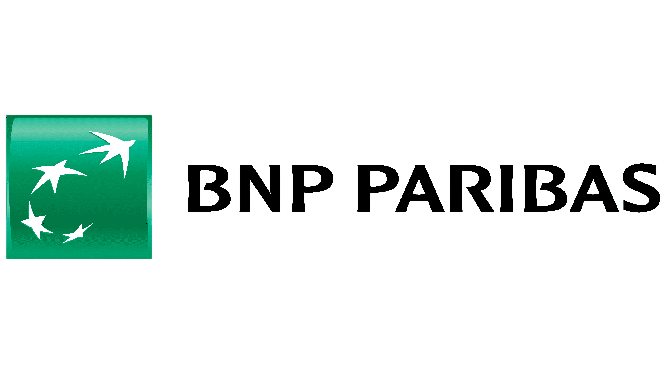
</div>
*"BNP Paribas Cardif uses scikit-learn for several of its machine learning models in production. Our internal community of developers and data scientists has been using scikit-learn since 2015, for several reasons: the quality of the developments, documentation and contribution governance."*

- **Spotify** <div>
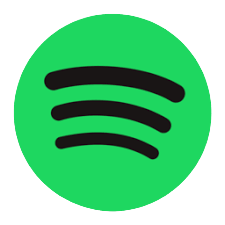
</div>


*"Scikit-learn provides a toolbox with solid implementations of a bunch of state-of-the-art models and makes it easy to plug them into existing applications. We’ve been using it quite a lot for music recommendations."*

- **Booking.com**
<div>
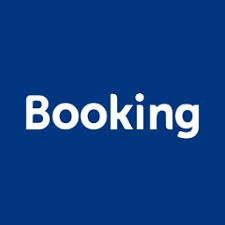
</div>
*"Booking.com uses machine learning algorithms for many different applications, such as recommending hotels and destinations, detecting fraudulent reservations, or scheduling customers service agents. Scikit-learn is one of the tools used when implementing standard algorithms for prediction tasks."*


## Scikit-Learn Algorithms
***
<br>
<br>

# Support Vector Machine

*The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(**N** — the number of features) that distinctly classifies the data points.*[[2](#section3)]

**Advantages**:
- Effective in high dimensional spaces and where number of dimensions > number of samples
- Memory Efficient
- Different Kernel functions can be specified
<br>
**Disadvantages**:
- Doesn't provide probability estimates[[3](#section4)]

SVM constructs a *hyperplane* or set of *hyperplanes* in a high- or infinite-dimensional space, which can be used for **classification**, **regression**, or other tasks like **outliers detection**.[[4](#section5)]

**Hyperplane**
<br>
If a classification task only has 2 features(or 2 dimensions), then a ***hyperplane*** would be a simple regression line that linearly separates and classifies a set of data on a 2D graph. When this ***hyperplane*** is defined, we can now use it classify data points. Any point to one side of a line is classified as group *A*, any point on the other side is classified as group *B*. The further a data point is from the ***hyperplane***, the probabilty that it has been classified correctly increases. This means that when new testing data is added, the side of the hyperplane it lands on decides the class it is assigned to.[[6](#section7)]

<img src="images/gif.gif" width="750" align="center">

*While there could be multiple hyperplanes, SVM tries to find the one that best seperates 2 categories.*[[5](#section6)]

<a id="reference"></a>

## Setup


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from itertools import product
import seaborn as sns

*In this classification I've used one of the datasets provided by sklearn library, more info can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html?highlight=digits#sklearn.datasets.load_digits).*

## Uploading the Digits dataset

In [2]:
# Loadging the datsaet. This dataset contains 1797 8-by-8 images of handwritten digits.
digits = datasets.load_digits()
X = digits.data
y = digits.target
images = digits.images.astype(np.int_)
n_classes = 10

# Scale the digits for numerical stability
X /= 16

# Shuffle the data and split them into training and testing sets
test_size = 1 / 3
X_train, X_test, y_train, y_test, images_train, images_test \
    = train_test_split(X, y, images, test_size=test_size, shuffle=True,
                       stratify=y, random_state=0)

print('Training shape: ', X_train.shape)
print('Test shape:     ', X_test.shape)

Training shape:  (1198, 64)
Test shape:      (599, 64)


In [3]:
# Check the amout of numbers in the dataset
samples = len(digits.images)
print("This particular dataset contains %d elements"% samples)

This particular dataset contains 1797 elements


In [4]:
digits.images[10]

array([[0.    , 0.    , 0.0625, 0.5625, 0.9375, 0.6875, 0.    , 0.    ],
       [0.    , 0.    , 0.6875, 1.    , 0.5   , 0.875 , 0.375 , 0.    ],
       [0.    , 0.125 , 1.    , 0.625 , 0.    , 0.5625, 0.5625, 0.    ],
       [0.    , 0.0625, 1.    , 0.25  , 0.    , 0.5   , 0.5   , 0.    ],
       [0.    , 0.25  , 1.    , 0.25  , 0.    , 0.5   , 0.5   , 0.    ],
       [0.    , 0.0625, 1.    , 0.3125, 0.0625, 0.6875, 0.1875, 0.    ],
       [0.    , 0.    , 0.75  , 0.75  , 0.625 , 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.0625, 0.625 , 0.8125, 0.1875, 0.    , 0.    ]])

*Here we can see that there are 64 numbers of input features, 8 rows and 8 columns*

## Visualize the data

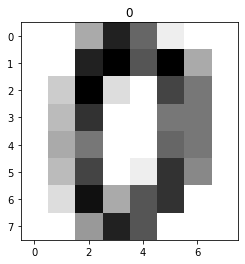

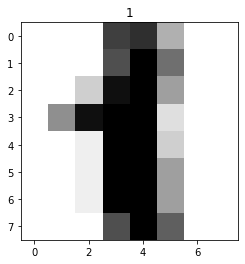

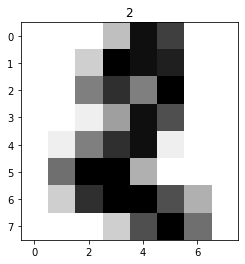

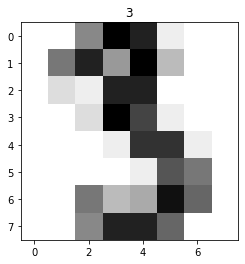

In [5]:
for i in range(4):
    plt.imshow(digits.images[i] , cmap = plt.cm.gray_r , interpolation = 'nearest')
    plt.title(str(digits.target[i]))
    plt.show()

## Displaying 10 sample digits along with the labels

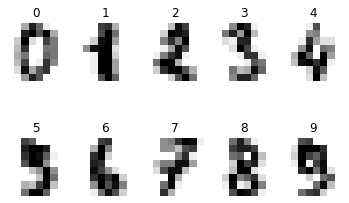

In [6]:
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(6,6))
for index, (image,label) in enumerate(images_and_labels[:10]):
    plt.subplot(3,5,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

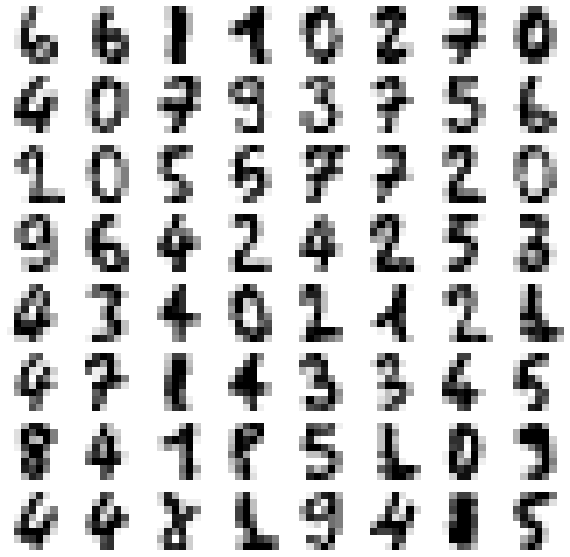

In [7]:
n_rows = 8
n_cols = 8

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))
k = 0
for i, j in product(range(n_rows), range(n_cols)):
    image = images_train[n_cols * i + j]
    ax[i, j].imshow(image, cmap='binary', interpolation='none')
    ax[i, j].axis('off')

plt.show()
plt.close()

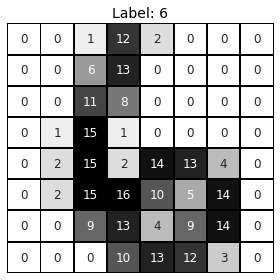

In [8]:
plt.figure(figsize=(4, 4))
index = 0
digit = images_train[index]
sns.heatmap(digit, vmin=0, vmax=15, cmap='binary', annot=True, fmt='d',
            annot_kws={'fontsize': 12}, cbar=False, linewidths=1,
            linecolor='k')
plt.xticks([])
plt.yticks([])
plt.title('Label: %d' % y_train[index], fontsize=14)
plt.tight_layout()
plt.show()
plt.close()

*Essentially, each digit is just an 8 by 8 grid of integers between 0 - 16*

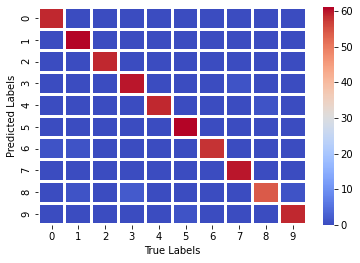

In [9]:
from sklearn import metrics
linear_model = svm.SVC(kernel='linear', degree=3, gamma='scale')
linear_model.fit(X_train,y_train)
# Predict
y_pred = linear_model.predict(X_test)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), cmap='coolwarm', linewidths=2)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()

*Confusion matrix helps us to visualize differences between actuals and predictions*


## Splitting the data into input features(pixel) and output target values

In [10]:
X = digits.images.reshape((samples, -1))
y= digits.target

## Train & Test

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y) # This function splits our dataset, previously we've had 1797 elements in the dataset.
print(X_train.shape)
print(X_test.shape)

(1347, 64)
(450, 64)


*Now our data is divided into training set containing **1347** elements and test set which contains **450** elements*

### What is Kernel?

A **kernel** is a function that takes the original non-linear problem and transforms it into a linear one within the higher-dimensional space.[[7](#section8)]

## Support Vector Classifier Model with Linear Kernel

In [12]:
linear_model = svm.SVC(kernel='linear', degree=3, gamma='scale')
linear_model.fit(X_train,y_train)
# Predict
y_pred = linear_model.predict(X_test)

## Checking the accuracy

In [13]:
accuracy = linear_model.score(X_test,y_test)

In [14]:
print(f"{accuracy:.0%} accuracy, our model is performing really good, let's see if we can do better")

99% accuracy, our model is performing really good, let's see if we can do better


## Creating another model with RBF Kernel and checking its accuracy

**Radial Basis Function** is the default kernel used within the sklearn’s SVM classification algorithm and can be described with the following formula:[[8](#section9)]


<img src="https://miro.medium.com/max/546/1*A-8LqEJEyedmdePZYke-IA.png"/>

$||x - x'||^2$ - *squared [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between 2 feature vectors.*
<br>
**Gamma** - *defines how mnuch influence a single traning set has.

In [191]:
RBF_model = svm.SVC(kernel='rbf', degree=3, gamma='scale')
RBF_model.fit(X_train,y_train)
#Predict
y_pred2 = RBF_model.predict(X_test)
accuracy_2 = RBF_model.score(X_test,y_test)
print(f"{accuracy_2:.0%} accuracy, by changing the kernel, we have increased the accuracy")

NameError: name 'svm' is not defined

## End SVM
***
<br>
<br>

# Logistic Regression
***

Logistic regression is a powerful supervised Machine Learning  algorithm used for binary classification problems (when target is [categorical](http://www.stat.yale.edu/Courses/1997-98/101/catdat.htm)). The best way to think about logistic regression is that it is a ***linear regression*** but for classification problems.
Logistic regression doesn’t predict the continuous values it predicts whether something is ***True*** or ***False***.

Logistic regression essentially uses a logistic function defined below to model a binary output variable. The main difference between [linear regression](https://machinelearningmastery.com/linear-regression-for-machine-learning/) and logistic regression is that logistic regression's range is bounded between 0 and 1. [[11](#section12)]


### Logistic Function

Logistic regression uses *logit function*, also known as ***log-odds***

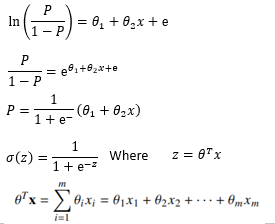

- **P** - probability that event Y occurs P(Y=1)
- $\frac{P}{1-P}$ - odds ratio
- θ - parameters of length *m*

### The goal is to predict whether people survived on titanic

*Dataset taken from [here](https://www.kaggle.com/heptapod/titanic)*

### Setup
***

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("datasets/titanic_train.csv");

In [54]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*As we can see, this dataset contains quite a lot missing values.*

<AxesSubplot:>

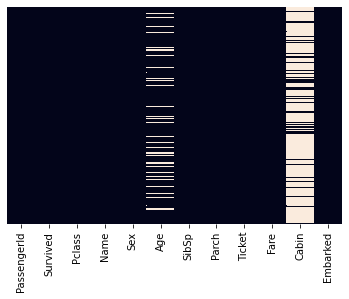

In [58]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False,annot_kws={'rotation':90})

*Heatmap to visualize the missing values.*

## Data Visualization

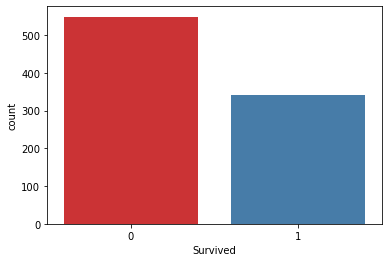

In [149]:
sns.countplot(x='Survived', data=data,palette="Set1")
plt.show()

*As we can see, there are more non-survivors than survivors*

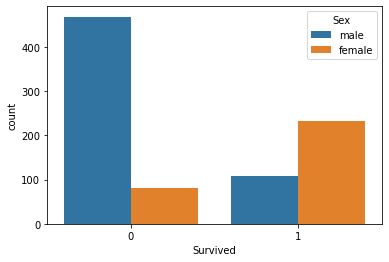

In [151]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.show()

*More female passangers survided.*

<AxesSubplot:xlabel='Survived', ylabel='count'>

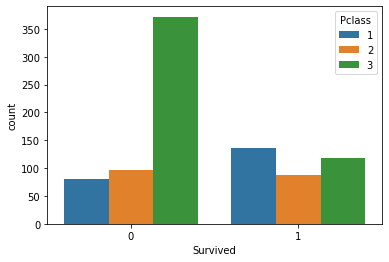

In [43]:
sns.countplot(x='Survived', hue='Pclass', data=data)

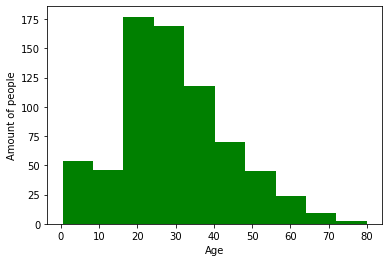

In [146]:
plt.hist(data['Age'].dropna(), color='green',histtype='barstacked')
plt.xlabel("Age")
plt.ylabel("Amount of people")
plt.show()

*From this plot we can notice that the vast majority of people on Titanic were 20-30 years old.*

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

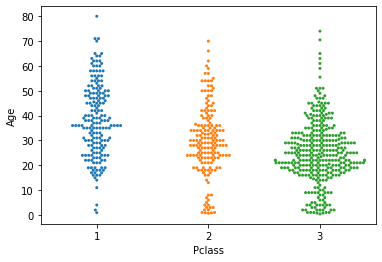

In [50]:
sns.swarmplot(x='Pclass',y='Age',data=data, size=3)

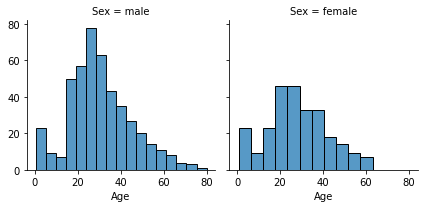

In [52]:
g = sns.FacetGrid(data=data, col='Sex')
g.map(sns.histplot, 'Age',kde=False)

In [53]:
from datetime import datetime # to create titanic timeline

In [152]:
# this method creates a timeline of a Titanic ship
# idea implemented from https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset
def display_timeline():
    tl_dates = [
        "WED April 10",
        "SUN April 14",
        "MON April 15",
        "THU April 18"
    ]

    tl_x = [1, 2, 6, 9]

    tl_sub_x = [1.5, 2.4, 2.9, 3.4, 3.8, 4.5, 5.0, 6.5, 7, 7.6, 8]
    tl_sub_times = [
        "1:30 PM",
        "9:00 AM",
        "1:42 PM",
        "7:15 PM",
        "10:00 PM",
        "11:30 PM",
        "11:40 PM",
        "12:20 AM",
        "12:45 AM",
        "2:00 AM",
        "2:20 AM",
    ]

    tl_text = [
        "Titanic sets sail.",
        "Recieve Message.",
        "Baltic Warns Titanic\nof icebergs.", 
        "Smith requests the\n return of the message.",
        "Second Officer\n Lightroller is\n relievced from duty.",
        "Warning bells, iceberg\n sighting.",
        "Titanic hits an iceberg.",
        "Life boats are being\n lowered.",
        "Passengers slowly arrive\n on deck.",
        "Rear of boat begins to\n raise.",
        "Titanic sinks."
    ]

    # Set figure & Axes
    fig, ax = plt.subplots(figsize=(15, 5), constrained_layout=True)
    ax.set_ylim(-2, 2)
    ax.set_xlim(0, 10)


    # Timeline : line
    ax.axhline(0, xmin=0.1, xmax=0.95, c='#4a4a4a', zorder=1)
    # Timeline : Date Points
    ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
    ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
    # Timeline : Time Points
    ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

    # Date Text
    for x, date in zip(tl_x, tl_dates):
        ax.text(x, -0.2, date, ha='center', 
                fontfamily='serif', fontweight='bold',
                color='#4a4a4a')


    # Stemplot : vertical line
    levels = np.zeros(len(tl_sub_x))    
    levels[::2] = 0.3
    levels[1::2] = -0.3
    markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
    plt.setp(baseline, zorder=0)
    plt.setp(markerline, marker=',', color='#4a4a4a')
    plt.setp(stemline, color='#4a4a4a')

    # Text
    for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
        ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
                fontfamily='serif', fontweight='bold',
                color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b', fontsize=11)

        ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
            fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b')

    # Spine
    for spine in ["left", "top", "right", "bottom"]:
        ax.spines[spine].set_visible(False)

    # Ticks    
    ax.set_xticks([]) 
    ax.set_yticks([]) 

    # Title
    ax.set_title("Titanic Timeline", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')

    plt.show()

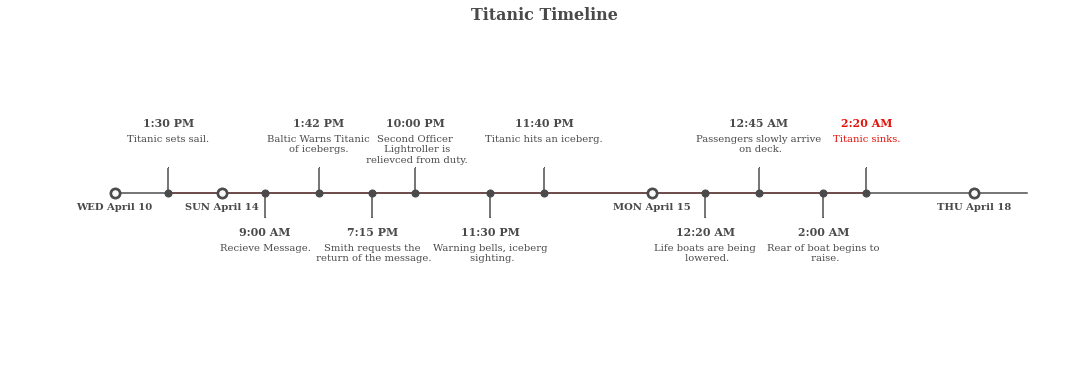

In [102]:
display_timeline()

In [28]:
survival_rate = data.groupby(['Sex']).mean()[['Survived']]
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']
display(survival_rate)

,Survived
Sex,
female,0.742038
male,0.188908


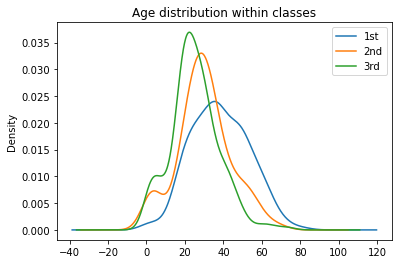

In [36]:
for x in [1,2,3]:    ## for 3 classes
    data.Age[data.Pclass == x].plot(kind="kde")
plt.title("Age distribution within classes")
plt.legend(("1st","2nd","3rd"))

*From the plot above we can see that more older people are from 1st class than that of 2nd and 3rd.*

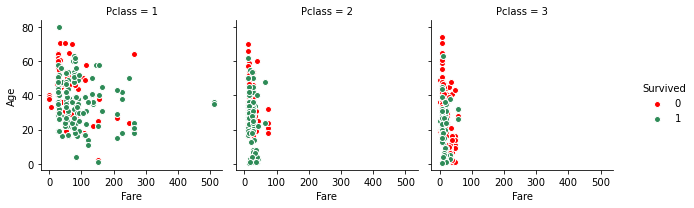

In [35]:
g = sns.FacetGrid(data, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"red"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

### Processing the Data

**For each *Age* missing value we'll enter median age which is 28**

In [153]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

### Verify, that the data has been filled

In [155]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*There are still some missing values in the **Cabin** column, I'll just drop it*

In [156]:
data.drop('Cabin', axis=1, inplace=True)

In [159]:
# Check for the non-numeric columns
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

***Name**, **Embarked** and **Ticket** are not neccessary for the prediction, hence they can be dropped*

In [162]:
# Convert sex column to numerical value
gender = pd.get_dummies(data['Sex'],drop_first=True)

In [170]:
data['Gender'] = gender

In [173]:
# Dropping unnecessary columns
data.drop(['Name','Sex','Ticket', 'Embarked'],axis=1)

KeyError: "['Name' 'Sex' 'Ticket' 'Embarked'] not found in axis"

In [172]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


### Train & Test

In [182]:
x = data[['PassengerId', 'Pclass','Age', 'SibSp','Parch','Fare','Gender']]
y = data['Survived']

### Building model using Logistic Regression

In [175]:
from sklearn.model_selection import train_test_split

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [184]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [185]:
# Fit the model
logistic_reg = LogisticRegression()

In [186]:
logistic_reg.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction

In [188]:
predict = logistic_reg.predict(x_test)

### Checking the accuracy

In [189]:
from sklearn.metrics import classification_report

In [190]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       169
           1       0.73      0.67      0.69        99

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



*Considering the Model selected and available, the accuracy is still good, however I've tested Random Forest Classifier which had almost 90% accuracy*

## END LOGISTIC REGRESSION
***
<br>
<br>

# Random Forest
***

*Random Forest[[1](#section2)] is a supervised learning technique, it can be used for both Classification and Regression problems in Machine Learning, based on the concept of [ensemble learning](https://en.wikipedia.org/wiki/Ensemble_learning)*

**Benefits of Random Forest Algorithm**
- takes less training time compared to other algorithms
- predicts output with high accuracy, even for large datasets
- maintains accuracy even when large amout of data is missing


### *The goal is to predict the quality of the wine*

*Dataset taken from [here](https://archive.ics.uci.edu/ml/datasets/Wine)*

### Setup


In [24]:
import pandas as pd # Data Frames
import numpy as np
import matplotlib.pyplot as plt # Used to visualize the data in 2D graph
import seaborn as sns # Open-source Python library built on top of matplotlib.Used for data visualization and exploratory data analysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


### Uploading the Red Wine Quality Dataset

In [25]:
# Loading the wine data set
df = pd.read_csv("datasets/winequality-red.csv", sep=';');


In [26]:
df.shape

(1599, 12)

In [27]:
# Displaying first 5 rows of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Checking if dataset contains any missing values

In [28]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

*As we can see, this particular dataset doesn't contain any missing values so we can proceed with the code*

### Data Analysis and Visualization for better data understanding

In [29]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


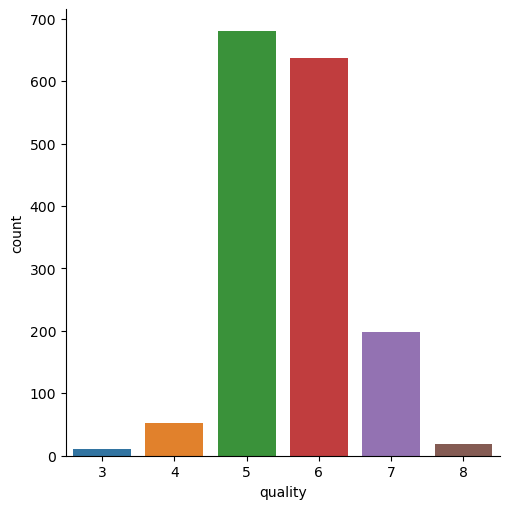

In [30]:
sns.catplot(x='quality',data = df, kind = 'count')

*This particular dataset contains a lot of mid-range quality wines, we can see that the wines that dominates here are having 5-6 quality score*

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

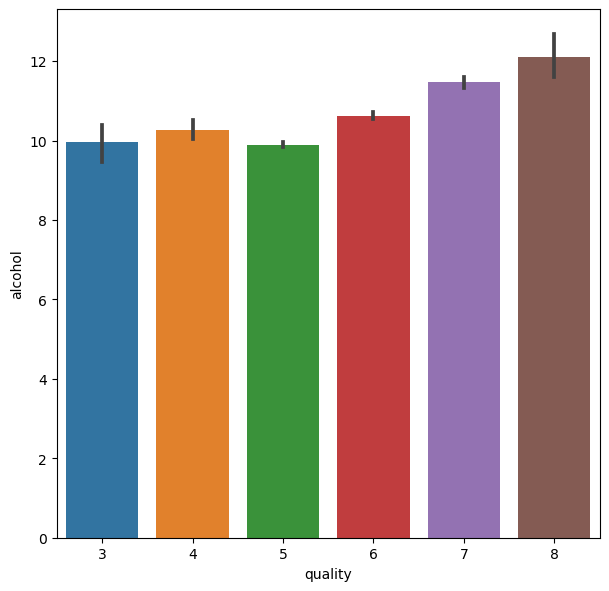

In [31]:
# Alcohol vs Quality
plot = plt.figure(figsize = (7,7))
sns.barplot(x='quality', y='alcohol', data = df)

*As we can notice from this bar plot is that better quality wines contains more alcohol*

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

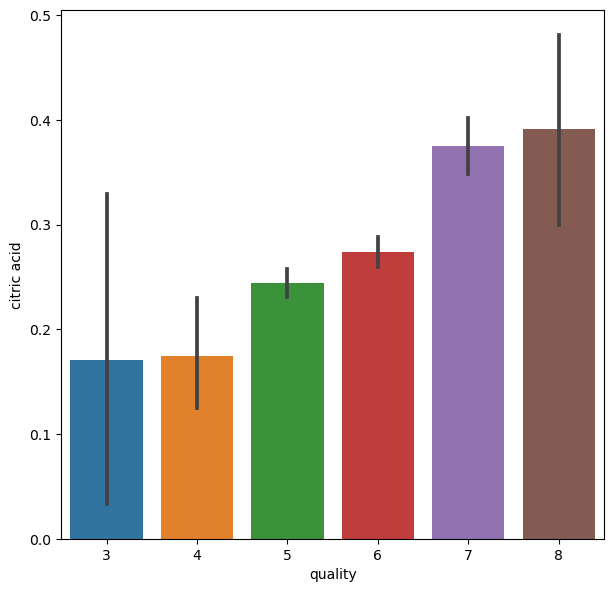

In [32]:
# Citric Acid vs Quality
plot = plt.figure(figsize = (7,7))
sns.barplot(x='quality', y='citric acid', data = df)

*The higher citric acidity value, the better the wine quality*

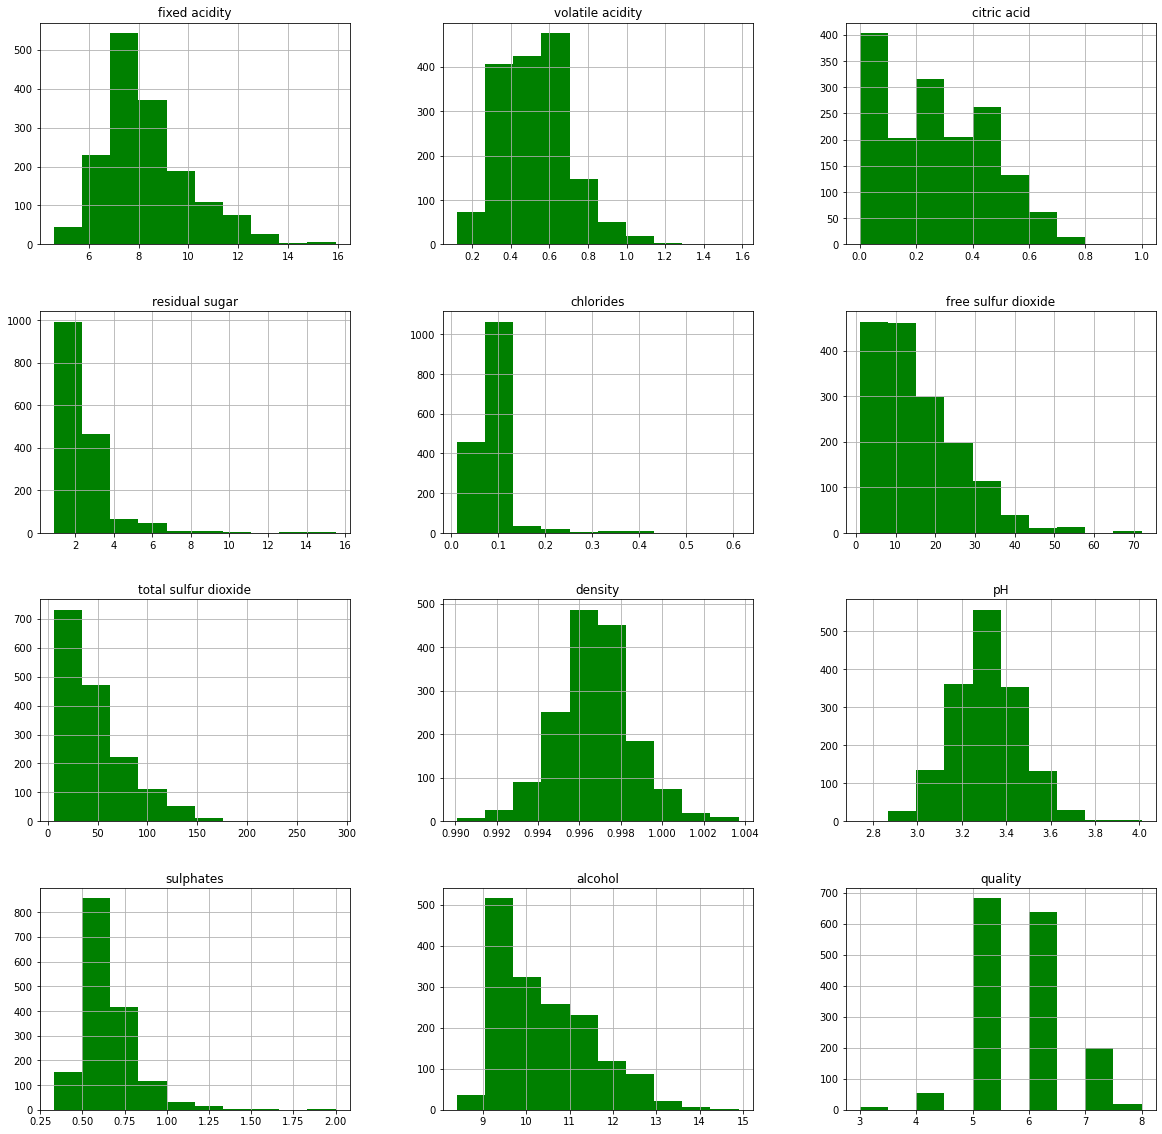

In [33]:
%matplotlib inline
df.hist(bins=10,figsize=(20,20), color="green")
# Display histogram
plt.show()

### Correlation

*Correlation is a relationship between two entities*

In [34]:
correlation = df.corr()

<AxesSubplot:>

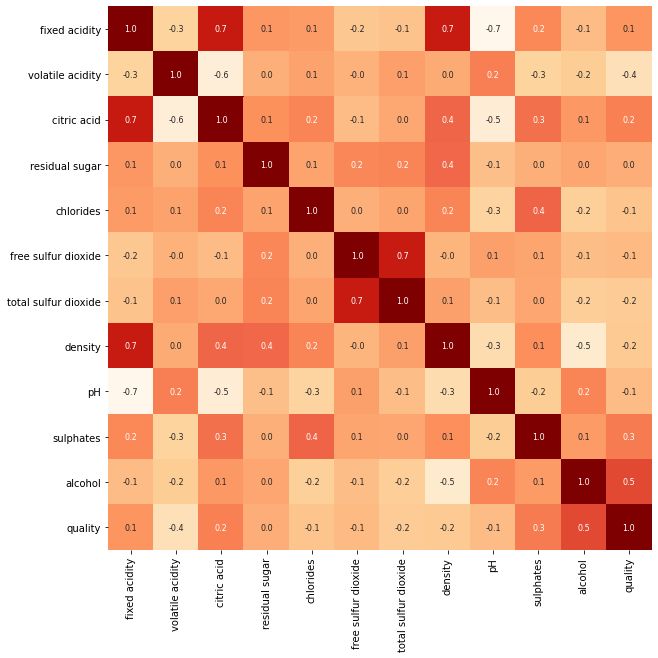

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar =False,square=True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'OrRd')

*Heatmap shows the data which depends on two independent variables as a color coded image plot.*

### Processing the Data

*Our target value is 'quality', that's why we drop it, and feed the data model with the rest of the parameters*

In [36]:
X = df.drop('quality',axis=1)

*We want to split the quality parameter on 'Good or 'Bad', let's say if the quality is > 7 the quality is 'Good'*

In [37]:
# Replace the quality value with numerical representation of 0 and 1 where 0 is Bad Quality and 1 is Good Quality
Y = df['quality'].apply(lambda y_value: 1 if y_value >=7 else 0)

### Train & Test

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state = 7)

In [39]:
model = RandomForestClassifier()

*To train our model we need to use fit() function to fit the data points to the Random Forest Classifier*

In [40]:
model.fit(X_train,Y_train)

RandomForestClassifier()

### Checking the accuracy

In [41]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [42]:
print('Accuracy: ',test_data_accuracy)

Accuracy:  0.8939393939393939


*Almost 90% accuracy, not bad! Our model is performing really well.*

### Building a Predictive System

In [43]:
# I've taken random row from the dataset and trying to predict the quality just for this particular instance
input = (11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8)

# Chaning the input data to numpy array
input_numpy = np.asarray(input)

# We have to reshape the data as we are tryng to predict the quality for only 1 instance
# If we won't reshape it, our model doesn't know we'are trying to predict the quality for only 1 instance and will look for all the values

reshaped_input = input_numpy.reshape(1,-1) # It tells the model we want to predict the quality for only 1 instance

pred = model.predict(reshaped_input)

*It will output either 0 or 1 where 0 is Bad Quality and 1 is Good Quality, we are expecting '0'.*

In [44]:
print(pred)

[0]


In [45]:
if(pred[0]==1):
    print('Good Quality')
else:
    print('Bad Quality')

Bad Quality


*Our model successfully predicted the quality of the wine!*

# End Random Forest
***
<br>
<br>

# References
***

[Decision Tree Classifier](http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/lguo/decisionTree.html

<a id='section2'></a>[[2] What is Random Forest Algorithm](https://www.javatpoint.com/machine-learning-random-forest-algorithm)

<a id='section3'></a>[[3] About SVM](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

<a id='section4'></a>[[4] Disadvantages and advantages of SVM](https://scikit-learn.org/stable/modules/svm.html)

<a id='section5'></a>[[5] SVM](https://en.wikipedia.org/wiki/Support-vector_machine)

<a id='section6'></a>[[6] Tool to generate gifs](https://gifs.com/dashboard/gifs)

<a id='section7'></a>[[7] About hyperplane](https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989)

<a id='section8'></a>[[8] Whats is Kernel?](https://towardsdatascience.com/svm-classifier-and-rbf-kernel-how-to-make-better-models-in-python-73bb4914af5b)

<a id='section9'></a>[[9] RBF Kernel](https://towardsdatascience.com/svm-classifier-and-rbf-kernel-how-to-make-better-models-in-python-73bb4914af5b)

<a id='section10'></a>[[10] Scikit-learn origin](https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htm)

<a id='section11'></a>[[11] Companies who uses scikit-learn](https://scikit-learn.org/stable/testimonials/testimonials.html)

<a id='section12'></a>[[12] Logistic Regression](https://www.sciencedirect.com/topics/computer-science/logistic-regression)